In [17]:
## DATA MANIPULATION
import pandas as pd
import numpy as np

## PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns

## WORD CLOUD
from wordcloud import WordCloud, STOPWORDS

In [3]:
## LOAD DATA
data = pd.read_csv('../data/train.csv')
data.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
## EXAMPLE COMMENT
data['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

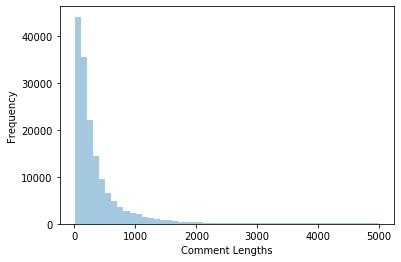

In [5]:
## CHECK LENGTHS OF COMMENTS
comment_lens = data['comment_text'].apply(len) # get comment lengths
ax = sns.distplot(comment_lens, kde=False)     # histogram 
ax.set_xlabel('Comment Lengths')
ax.set_ylabel('Frequency')
plt.show()

In [6]:
## CHECK LABEL DISTRIBUTION
labels = list(data.columns[2:])
data[labels].sum(axis=0)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

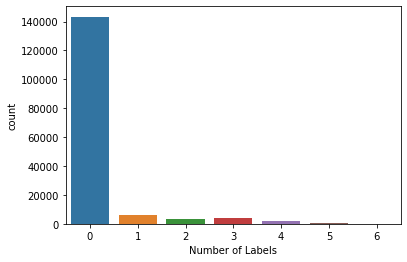

In [7]:
## CHECK NUMBER OF COMMENTS WITH MORE THAN 1 LABEL (MULTI-LABEL CLASSIFICATION)
nlabels = data[labels].sum(axis=1) # Get number of labels
ax = sns.countplot(nlabels)         # Count plot of labels
ax.set_xlabel('Number of Labels')
plt.show()

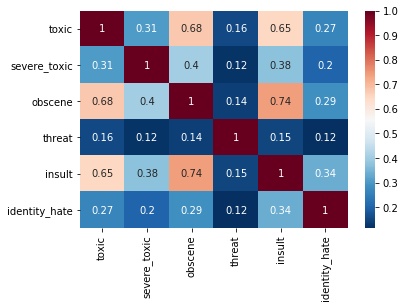

In [15]:
## Correlation among labels 
sel_data = data[2:]
corr = sel_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot = True,
            cmap = 'RdBu_r')
plt.show()